In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [121]:
mail_data = pd.read_csv('mail_data.csv')

In [122]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [123]:
mail_data.shape

(5572, 2)

In [124]:
mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [125]:
mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [126]:
mail_data['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

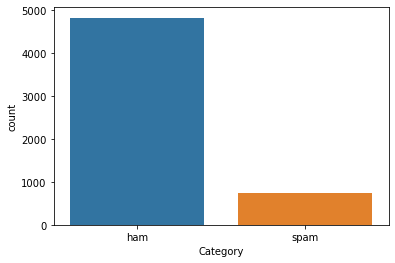

In [127]:
sns.countplot(mail_data['Category'])

# replace the null values with null strings

In [128]:
mail_data = mail_data.where((pd.notnull(mail_data)),'')

In [129]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Label Encoding

In [130]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
mail_data['Category'] = encoder.fit_transform(mail_data['Category'])

In [131]:
mail_data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# 0 --> ham
# 1 --> Spam

In [132]:
X = mail_data['Message']
y = mail_data['Category']

In [133]:
X.shape,y.shape

((5572,), (5572,))

In [134]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [135]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Category, dtype: int32

# Train test split 

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [137]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4457,) (1115,) (4457,) (1115,)


# Convert text data in numerical value
# Feature Extraction

In [138]:
vectorizer = TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')

In [139]:
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

In [140]:
X_train_features.dtype

dtype('float64')

In [141]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [142]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

# Model training

In [143]:
model = LogisticRegression()

In [144]:
model.fit(X_train_features,y_train)

LogisticRegression()

# Evaluating the model

In [145]:
train_predictions = model.predict(X_train_features)

In [146]:
print("Accuracy score training data:: ",accuracy_score(y_train,train_predictions))

Accuracy score training data::  0.9670181736594121


In [147]:
test_predictions = model.predict(X_test_features)

In [148]:
print("Accuracy score testing data:: ",accuracy_score(y_test,test_predictions))

Accuracy score testing data::  0.9659192825112107


# Building a Predictive System

In [149]:
input_data = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

vec_input = vectorizer.transform(input_data)

prediction = model.predict(vec_input)
print(prediction)
if(prediction[0]==1):
    print("SPAM MAIL!")
else:
    print("HAM MAIL")

[1]
SPAM MAIL!
